In [1]:
# Filepaths, numpy, and Tensorflow
import os

import numpy as np
np.random.seed(0)

In [2]:
cwd_path = os.getcwd()
images_path = os.path.join(cwd_path, 'image_dataset/dataset')

# List the clouds in the dataset folder: 10 Clouds
list_clouds = [name for name in os.listdir(images_path)]
list_clouds.remove('.DS_Store')
list_clouds

['altostratus',
 'stratus',
 'cumulonimbus',
 'cirrostratus',
 'stratocumulus_cloud',
 'cirrocumulus',
 'nimbostratus',
 'cumulus',
 'altocumulus',
 'cirrus']

In [3]:
# Create dictionary to store the list of image files based off cloud name
dict_clouds = {}

# Loop thru list of clouds
for cloud in list_clouds:
    # Get files based off each cloud
    cloud_path = os.path.join(images_path, cloud + '/positive')
    files = [os.path.join(cloud_path, f) for f in os.listdir(cloud_path) if os.path.isfile(os.path.join(cloud_path, f))]
    # add cloud and file list into dictionary
    dict_clouds[cloud] = files

len(dict_clouds)

10

In [4]:
def prepare_image(img):
    # Convert the image to a numpy array
    img = image.img_to_array(img)
    # Scale from 0 to 255
    img /= 255
    # Invert the pixels
    img = 1 - img
    # Flatten the image to an array of pixels
    image_array = img.flatten().reshape(-1, 299 * 299)
    # Return the processed feature array
    return image_array

In [5]:
from keras.preprocessing import image
# Load the saved image using Keras and resize it to the
# format of 299x299 pixels
image_size = (299, 299)
filepath = dict_clouds['altocumulus'][0]
im = image.load_img(filepath, target_size=image_size,
                    grayscale=True)

# Convert the 2D image to an array of pixel values
image_array = prepare_image(im)

img = image.load_img(filepath, target_size=image_size)
print(image_array)

Using TensorFlow backend.


[[0.827451   0.8235294  0.8235294  ... 0.41568625 0.4078431  0.45490193]]


/anaconda3/envs/PythonData/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:98: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [6]:
image_array.shape

(1, 89401)

In [7]:
image_array

array([[0.827451  , 0.8235294 , 0.8235294 , ..., 0.41568625, 0.4078431 ,
        0.45490193]], dtype=float32)

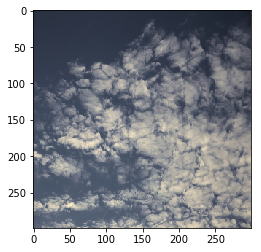

In [9]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(img)